### **Import de librerías y carga de los datos**

In [121]:
# LIBRERÍAS
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
tabla_hechos = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\1_tabla_hechos.csv')
tabla_clima = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\2_tabla_clima.csv')
tabla_rango_poblacion = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\3_tabla_rango_poblacion.csv')
tabla_coordenadas = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\4_tabla_coordenadas.csv')
tabla_poblacion = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\5_tabla_poblacion.csv')
tabla_pais = pd.read_csv('D:\Documents\Analista de Datos\Proyectos\s16-21-n-data-bi\CSV\\6_tabla_pais.csv')

In [4]:
# Columna a filtrar
colombia = ['CO']

df_hechos_co = tabla_hechos[tabla_hechos['country_code'].isin(colombia)]
df_clima_co = tabla_clima[tabla_clima['country_code'].isin(colombia)]
df_rango_poblacion_co = tabla_rango_poblacion[tabla_rango_poblacion['country_code'].isin(colombia)]
df_coordenadas_co = tabla_coordenadas[tabla_coordenadas['country_code'].isin(colombia)]
df_poblacions_co = tabla_poblacion[tabla_poblacion['country_code'].isin(colombia)]
df_pais_co = tabla_pais[tabla_pais['country_code'].isin(colombia)]

### **Manipulación y Filtrado de los datos de la 'tabla_hechos.csv'**

In [5]:
print('Primeras filas del Dataframe')
print('============================')
df_hechos_co.head()

Primeras filas del Dataframe


,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
540095,CO,2020-01-01,CO,0.0,0.0,0.0,0.0,NaN
540096,CO,2020-01-02,CO,0.0,0.0,0.0,0.0,NaN
540097,CO,2020-01-03,CO,0.0,0.0,0.0,0.0,NaN
540098,CO,2020-01-04,CO,0.0,0.0,0.0,0.0,NaN
540099,CO,2020-01-05,CO,0.0,0.0,0.0,0.0,NaN


In [6]:
print('Descripción del Dataframe')
print('============================')
print(df_hechos_co.describe())

Descripción del Dataframe
       new_confirmed   new_deceased  cumulative_confirmed  \
count  338664.000000  338664.000000          3.386640e+05   
mean       52.514209       1.407820          1.895515e+04   
std       610.164967      14.267128          2.239210e+05   
min         0.000000       0.000000          0.000000e+00   
25%         1.000000       0.000000          1.170000e+02   
50%         2.000000       0.000000          3.900000e+02   
75%         6.000000       0.000000          1.658250e+03   
max     40415.000000     716.000000          6.304317e+06   

       cumulative_deceased  cumulative_vaccine_doses_administered  
count        338664.000000                           1.043100e+04  
mean            529.220295                           2.018681e+06  
std            5741.382788                           8.314109e+06  
min               0.000000                           0.000000e+00  
25%               5.000000                           3.745100e+04  
50%             

In [7]:
print('Información del Dataframe')
print('============================')
print(df_hechos_co.info())

Información del Dataframe
<class 'pandas.core.frame.DataFrame'>
Index: 1145596 entries, 540095 to 1685690
Data columns (total 8 columns):
 #   Column                                 Non-Null Count    Dtype  
---  ------                                 --------------    -----  
 0   location_key                           1145596 non-null  object 
 1   date                                   1145596 non-null  object 
 2   country_code                           1145596 non-null  object 
 3   new_confirmed                          338664 non-null   float64
 4   new_deceased                           338664 non-null   float64
 5   cumulative_confirmed                   338664 non-null   float64
 6   cumulative_deceased                    338664 non-null   float64
 7   cumulative_vaccine_doses_administered  10431 non-null    float64
dtypes: float64(5), object(3)
memory usage: 78.7+ MB
None


In [8]:
df_hechos_co.columns

Index(['location_key', 'date', 'country_code', 'new_confirmed', 'new_deceased',
       'cumulative_confirmed', 'cumulative_deceased',
       'cumulative_vaccine_doses_administered'],
      dtype='object')

In [9]:
# SE TENDRIA QUE BORRAR LOS REGISTROS MENORES AL 2020-03-06 Y MAYORES A 2022-09-13
filtro_shows = (df_hechos_co['date'] >= '2020-03-06') & (df_hechos_co['date'] <= '2022-09-13') & (df_hechos_co['new_confirmed'].notnull())

# Aplicar el filtro y crear un nuevo dataframe con los resultados
df_filtrado = df_hechos_co[filtro_shows]

# Mostrar los resultados
print("Shows de los casos confirmados en 0")
df_filtrado

Shows de los casos confirmados en 0


,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
540160,CO,2020-03-06,CO,1.0,0.0,1.0,0.0,NaN
540161,CO,2020-03-07,CO,0.0,1.0,1.0,1.0,NaN
540162,CO,2020-03-08,CO,0.0,0.0,1.0,0.0,NaN
540163,CO,2020-03-09,CO,2.0,0.0,3.0,1.0,NaN
540164,CO,2020-03-10,CO,0.0,1.0,3.0,2.0,NaN
...,...,...,...,...,...,...,...,...
1685449,CO_99_99773,2022-01-19,CO,1.0,0.0,305.0,10.0,NaN
1685450,CO_99_99773,2022-01-20,CO,7.0,0.0,312.0,10.0,NaN
1685451,CO_99_99773,2022-01-21,CO,5.0,0.0,317.0,10.0,NaN
1685452,CO_99_99773,2022-01-22,CO,1.0,0.0,318.0,10.0,NaN


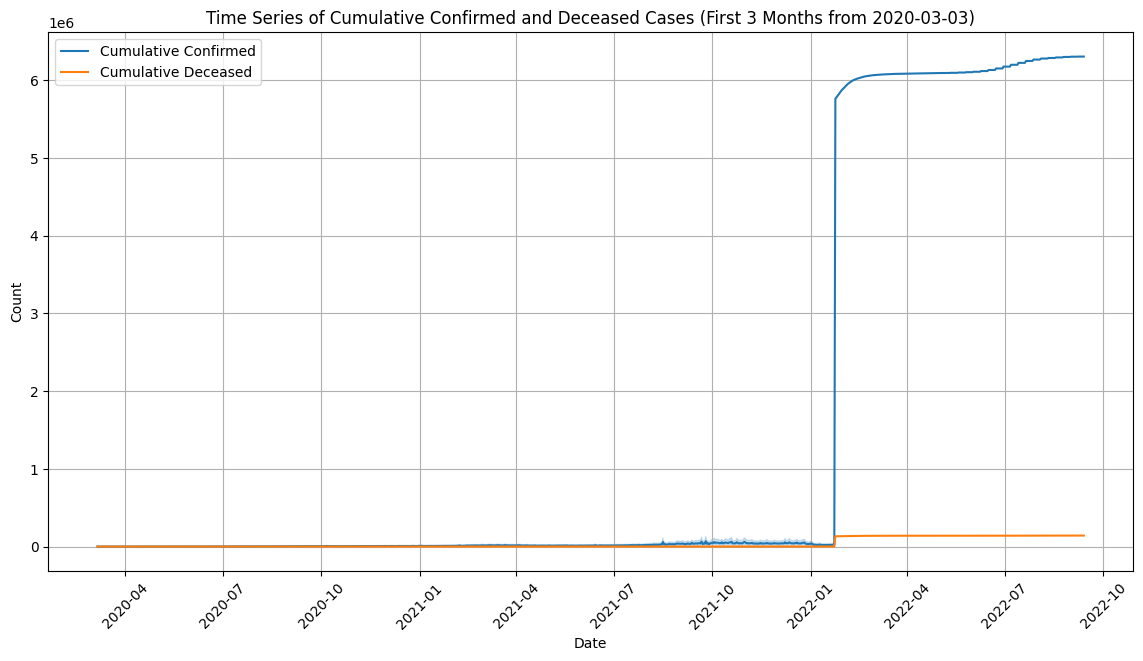

In [120]:
# Crear el gráfico de series temporales
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_filtrado, x='date', y='cumulative_confirmed', label='Cumulative Confirmed')
sns.lineplot(data=df_filtrado, x='date', y='cumulative_deceased', label='Cumulative Deceased')
plt.title('Time Series of Cumulative Confirmed and Deceased Cases (First 3 Months from 2020-03-03)')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

In [11]:
df_hechos_co = df_filtrado
df_hechos_co.isnull().sum()

location_key                                  0
date                                          0
country_code                                  0
new_confirmed                                 0
new_deceased                                  0
cumulative_confirmed                          0
cumulative_deceased                           0
cumulative_vaccine_doses_administered    328570
dtype: int64

In [24]:
# Asegúrate de que 'date' sea de tipo datetime
df_hechos_co.dtypes

location_key                                     object
date                                     datetime64[ns]
country_code                                     object
new_confirmed                                   float64
new_deceased                                    float64
cumulative_confirmed                            float64
cumulative_deceased                             float64
cumulative_vaccine_doses_administered           float64
dtype: object

- **Aplicando la Interpolación**

In [26]:
# Contar los valores únicos en la columna 'cumulative_vaccine_doses_administered'
counts = df_hechos_co['cumulative_vaccine_doses_administered'].value_counts()

# Obtener el número de veces que aparece el valor cero
count_zeros = counts.get(0, 0)  # Obtener el conteo del valor cero, si no hay ninguno, devolver 0

print(f"Número de ceros en 'cumulative_vaccine_doses_administered': {count_zeros}")

Número de ceros en 'cumulative_vaccine_doses_administered': 43


In [83]:
prueba = df_hechos_co
descripcion = prueba.describe()
descripcion_redondeada = descripcion.round(2)
descripcion_redondeada

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
count,338599,338599.00,338599.00,338599.00,338599.00,338599.00
mean,2021-03-28 03:02:08.892288256,52.52,1.41,18958.79,529.32,1789229.29
min,2020-03-06 00:00:00,0.00,0.00,0.00,0.00,2.00
25%,2020-11-17 00:00:00,1.00,0.00,117.00,5.00,400050.15
50%,2021-04-10 00:00:00,2.00,0.00,390.00,17.00,1030181.76
75%,2021-07-21 00:00:00,6.00,0.00,1659.00,63.00,2006050.39
max,2022-09-13 00:00:00,40415.00,716.00,6304317.00,155770.00,87566541.00
std,NaN,610.22,14.27,223942.32,5741.93,3405798.93


In [109]:
prueba['cumulative_vaccine_doses_administered'] = prueba['cumulative_vaccine_doses_administered'].replace(0,'NaN').fillna(method='pad')

C:\Users\Kuma\AppData\Local\Temp\ipykernel_2748\3737398587.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prueba['cumulative_vaccine_doses_administered'] = prueba['cumulative_vaccine_doses_administered'].replace(0,'NaN').fillna(method='pad')
C:\Users\Kuma\AppData\Local\Temp\ipykernel_2748\3737398587.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prueba['cumulative_vaccine_doses_administered'] = prueba['cumulative_vaccine_doses_administered'].replace(0,'NaN').fillna(method='pad')


In [111]:
prueba.isnull().sum()

location_key                             0
date                                     0
country_code                             0
new_confirmed                            0
new_deceased                             0
cumulative_confirmed                     0
cumulative_deceased                      0
cumulative_vaccine_doses_administered    0
dtype: int64

In [118]:
filtro_loc = prueba['location_key']=='CO_05_05001'
prueba2 = prueba[filtro_loc]
prueba2.round(2)

,location_key,date,country_code,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
542145,CO_05_05001,2020-03-09,CO,1.0,0.0,1.0,0.0,9776369.96
542147,CO_05_05001,2020-03-11,CO,2.0,0.0,3.0,0.0,9776145.92
542150,CO_05_05001,2020-03-14,CO,2.0,0.0,5.0,0.0,9775921.88
542151,CO_05_05001,2020-03-15,CO,1.0,0.0,6.0,0.0,9775697.84
542155,CO_05_05001,2020-03-19,CO,3.0,0.0,9.0,0.0,9775473.81
...,...,...,...,...,...,...,...,...
542826,CO_05_05001,2022-01-19,CO,2275.0,29.0,501074.0,10858.0,9625367.73
542827,CO_05_05001,2022-01-20,CO,1940.0,20.0,503014.0,10878.0,9625143.69
542828,CO_05_05001,2022-01-21,CO,1571.0,17.0,504585.0,10895.0,9624919.65
542829,CO_05_05001,2022-01-22,CO,309.0,14.0,504894.0,10909.0,9624695.61


In [116]:
descripcion = prueba2.describe()
desc_redondo = descripcion.round(2)
desc_redondo

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered
count,680,680.00,680.00,680.00,680.00,680.00
mean,2021-02-17 11:02:49.411764736,1308.47,29.24,378460.23,8794.12,22488698.59
min,2020-03-09 00:00:00,0.00,0.00,1.00,0.00,623.00
25%,2020-08-31 18:00:00,383.00,11.00,84822.50,1976.50,3701832.00
50%,2021-02-17 12:00:00,987.00,24.00,341751.00,7195.50,8831316.00
75%,2021-08-06 06:00:00,1901.75,38.00,723247.75,17224.50,40608008.61
max,2022-01-23 00:00:00,8613.00,144.00,889761.00,19880.00,81329392.38
std,NaN,1258.87,26.35,298097.76,7237.56,24786006.77


In [112]:
prueba.to_csv('prueba.csv', index=False)

### **Manipulación y Filtrado de los datos de la 'tabla_clima.csv'**

In [4]:
print('Información del Dataframe')
print('============================')
df_clima_co.info()

Información del Dataframe
<class 'pandas.core.frame.DataFrame'>
Index: 1145596 entries, 540095 to 1685690
Data columns (total 8 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   location_key                 1145596 non-null  object 
 1   date                         1145596 non-null  object 
 2   country_code                 1145596 non-null  object 
 3   average_temperature_celsius  1115369 non-null  float64
 4   minimum_temperature_celsius  1115324 non-null  float64
 5   maximum_temperature_celsius  1115322 non-null  float64
 6   rainfall_mm                  1058136 non-null  float64
 7   relative_humidity            1115261 non-null  float64
dtypes: float64(5), object(3)
memory usage: 78.7+ MB


In [5]:
print('Valores nulos del Dataframe')
print('============================')
df_clima_co.isnull().sum()

Valores nulos del Dataframe


location_key                       0
date                               0
country_code                       0
average_temperature_celsius    30227
minimum_temperature_celsius    30272
maximum_temperature_celsius    30274
rainfall_mm                    87460
relative_humidity              30335
dtype: int64

In [6]:
print('Primeras Filas del Dataframe')
print('============================')
df_clima_co.head()

Primeras Filas del Dataframe


,location_key,date,country_code,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
540095,CO,2020-01-01,CO,21.962963,16.972222,26.629630,1.828800,79.195200
540096,CO,2020-01-02,CO,23.027778,17.398148,28.083333,3.090333,74.373649
540097,CO,2020-01-03,CO,23.583333,17.185185,28.500000,1.100667,69.195171
540098,CO,2020-01-04,CO,23.574074,16.518519,28.694444,0.084667,63.788427
540099,CO,2020-01-05,CO,23.324074,16.916667,28.583333,0.000000,66.070403


In [7]:
print('Descripción del Dataframe')
print('============================')
df_clima_co.describe()

Descripción del Dataframe


,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
count,1.115369e+06,1.115324e+06,1.115322e+06,1.058136e+06,1.115261e+06
mean,2.296017e+01,1.882417e+01,2.717483e+01,2.746961e+00,7.605798e+01
std,3.535728e+00,3.620498e+00,3.551647e+00,5.609925e+00,7.124449e+00
min,1.144444e+01,2.000000e+00,1.400000e+01,0.000000e+00,2.850726e+01
25%,2.043056e+01,1.635185e+01,2.463889e+01,0.000000e+00,7.156855e+01
50%,2.259259e+01,1.839815e+01,2.691270e+01,6.350000e-02,7.654812e+01
75%,2.544444e+01,2.113333e+01,2.966667e+01,3.156857e+00,8.105760e+01
max,3.605556e+01,3.500000e+01,3.900000e+01,4.099560e+02,1.000000e+02


In [8]:
df_clima_co.columns

Index(['location_key', 'date', 'country_code', 'average_temperature_celsius',
       'minimum_temperature_celsius', 'maximum_temperature_celsius',
       'rainfall_mm', 'relative_humidity'],
      dtype='object')

In [9]:
# Filtrado de los datos del clima
filtro_clima = (df_clima_co['average_temperature_celsius'].notnull())

df_clima_filtrado = df_clima_co[filtro_clima]
df_clima_filtrado

,location_key,date,country_code,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
540095,CO,2020-01-01,CO,21.962963,16.972222,26.629630,1.828800,79.195200
540096,CO,2020-01-02,CO,23.027778,17.398148,28.083333,3.090333,74.373649
540097,CO,2020-01-03,CO,23.583333,17.185185,28.500000,1.100667,69.195171
540098,CO,2020-01-04,CO,23.574074,16.518519,28.694444,0.084667,63.788427
540099,CO,2020-01-05,CO,23.324074,16.916667,28.583333,0.000000,66.070403
...,...,...,...,...,...,...,...,...
1684907,CO_99_99773,2020-07-26,CO,27.388889,24.000000,35.000000,0.000000,81.245471
1684908,CO_99_99773,2020-07-27,CO,26.166667,23.000000,30.000000,0.000000,84.997810
1684909,CO_99_99773,2020-07-28,CO,27.666667,24.000000,34.000000,0.000000,78.610408
1684910,CO_99_99773,2020-07-29,CO,26.222222,23.000000,33.000000,0.000000,85.574691


In [29]:
# Filtrado de los datos del clima
filtro_clima_date = (df_clima_co['date'] >= '2020-01-01') & (df_clima_co['date'] < '2020-04-01')

df_clima_date = df_clima_co[filtro_clima_date]
df_clima_date.describe()

,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
count,103275.000000,103275.000000,103273.000000,103196.000000,103275.000000
mean,24.376745,19.069305,29.296082,2.166265,69.323000
std,3.097851,3.201074,3.322669,5.048257,7.578881
min,14.180556,6.069444,16.740741,0.000000,29.848384
25%,22.388889,17.023810,27.428571,0.000000,64.031401
50%,23.962963,18.626984,29.119048,0.254000,69.065645
75%,26.500000,21.194444,31.507937,2.032000,74.658131
max,36.055556,35.000000,39.000000,409.956000,96.255051


NOTA: tomando en cuenta los periodos de tiempo del año (trimestrales). podemos hacer la imputacion de las columnas 
- average_temperature_celsius
- minimum_temperature_celsius
- maximum_temperature_celsius
- relative_humidity (promedio)

Por el promedio.

In [10]:
df_clima_filtrado.isnull().sum()

location_key                       0
date                               0
country_code                       0
average_temperature_celsius        0
minimum_temperature_celsius       45
maximum_temperature_celsius       47
rainfall_mm                    57233
relative_humidity                108
dtype: int64

In [13]:
df_clima_filtrado = df_clima_filtrado.round(2)
df_clima_filtrado

,location_key,date,country_code,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
540095,CO,2020-01-01,CO,21.96,16.97,26.63,1.83,79.20
540096,CO,2020-01-02,CO,23.03,17.40,28.08,3.09,74.37
540097,CO,2020-01-03,CO,23.58,17.19,28.50,1.10,69.20
540098,CO,2020-01-04,CO,23.57,16.52,28.69,0.08,63.79
540099,CO,2020-01-05,CO,23.32,16.92,28.58,0.00,66.07
...,...,...,...,...,...,...,...,...
1684907,CO_99_99773,2020-07-26,CO,27.39,24.00,35.00,0.00,81.25
1684908,CO_99_99773,2020-07-27,CO,26.17,23.00,30.00,0.00,85.00
1684909,CO_99_99773,2020-07-28,CO,27.67,24.00,34.00,0.00,78.61
1684910,CO_99_99773,2020-07-29,CO,26.22,23.00,33.00,0.00,85.57


In [15]:
descripcion = df_clima_filtrado.describe()
descripcion = descripcion.round(2)
descripcion

,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
count,1115369.00,1115324.00,1115322.00,1058136.00,1115261.00
mean,22.96,18.82,27.17,2.75,76.06
std,3.54,3.62,3.55,5.61,7.12
min,11.44,2.00,14.00,0.00,28.51
25%,20.43,16.35,24.64,0.00,71.57
50%,22.59,18.40,26.91,0.06,76.55
75%,25.44,21.13,29.67,3.16,81.06
max,36.06,35.00,39.00,409.96,100.00


In [17]:
df_clima_sorted = df_clima_filtrado.sort_values(by='average_temperature_celsius', ascending=True)
df_clima_sorted

,location_key,date,country_code,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,relative_humidity
1249045,CO_50_50318,2021-01-20,CO,11.44,2.0,21.00,0.0,65.33
1248054,CO_50_50313,2021-01-20,CO,11.44,2.0,21.00,0.0,65.33
1264901,CO_50_50711,2021-01-20,CO,11.44,2.0,21.00,0.0,65.33
1236162,CO_50,2021-01-20,CO,11.44,2.0,21.00,0.0,65.33
1241117,CO_50_50150,2021-01-20,CO,11.44,2.0,21.00,0.0,65.33
...,...,...,...,...,...,...,...,...
1665934,CO_94_94886,2020-03-04,CO,35.56,30.5,38.11,0.0,33.44
1658997,CO_94,2020-03-04,CO,35.56,30.5,38.11,0.0,33.44
1681790,CO_99_99001,2020-03-04,CO,35.56,30.5,38.11,0.0,33.44
1684763,CO_99_99773,2020-03-04,CO,35.72,30.0,38.00,0.0,29.85


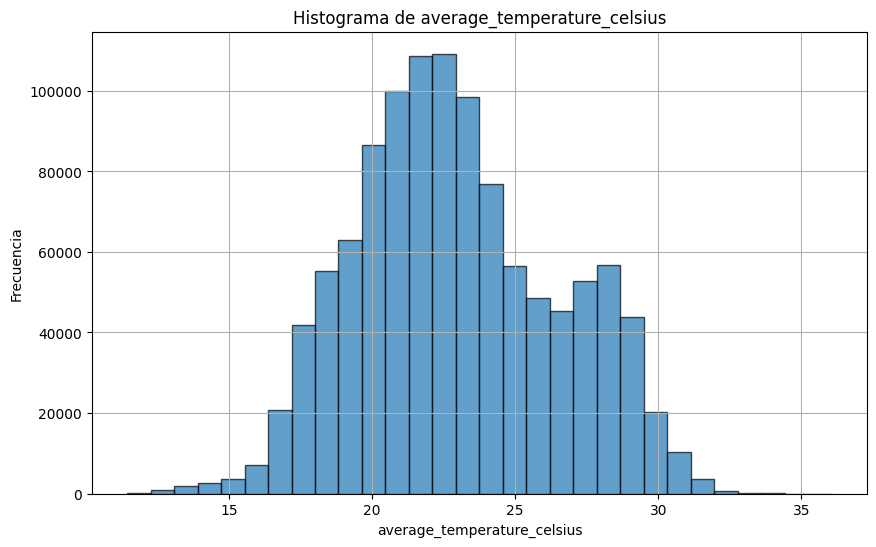

In [121]:
# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_clima_filtrado['average_temperature_celsius'].dropna(), bins=30, edgecolor='k', alpha=0.7)
plt.title('Histograma de average_temperature_celsius')
plt.xlabel('average_temperature_celsius')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

### **Manipulación y Filtrado de los datos de la 'tabla_rango_poblacion.csv'**